In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.constants import c
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import csv
import pandas as pd
import sympy as sym
import fprlib as fp
import glob

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

#x,y = np.loadtxt('osciloskop_meritve.csv', delimiter=',', skiprows=1, unpack=True)

"""
# Grafiranje:

fig, ax = plt.subplots()

ax.plot(x, y, c="darkblue", ls="-", lw=0.5, label=r"Napetost na vezju")
ax.plot([-0.07,0.07], [32,32],c="r", ls="-", lw=0.4, label=r"32 V napetost")
ax.grid(True, which="both")
plt.xlabel(r"Čas [s]")
plt.ylabel(r"Amplituda [V]")
plt.legend(loc='best')
#ax.set_ylim([-1, 1])
ax.set_xlim([-0.00005, 0.0007])
plt.title("Začetno odstopanje napetosti skozi vezje tuljave")
fig.show()
fig.savefig("start_impulse", dpi=600, bbox_inches='tight', transparent=False)
"""
print("...") # Narejeno da ne izpiše celotnega block comment-a zgoraj \lol

...


0.0858985 -0.639196


C:\Users\X\AppData\Local\Temp\ipykernel_22304\2492111291.py:37: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


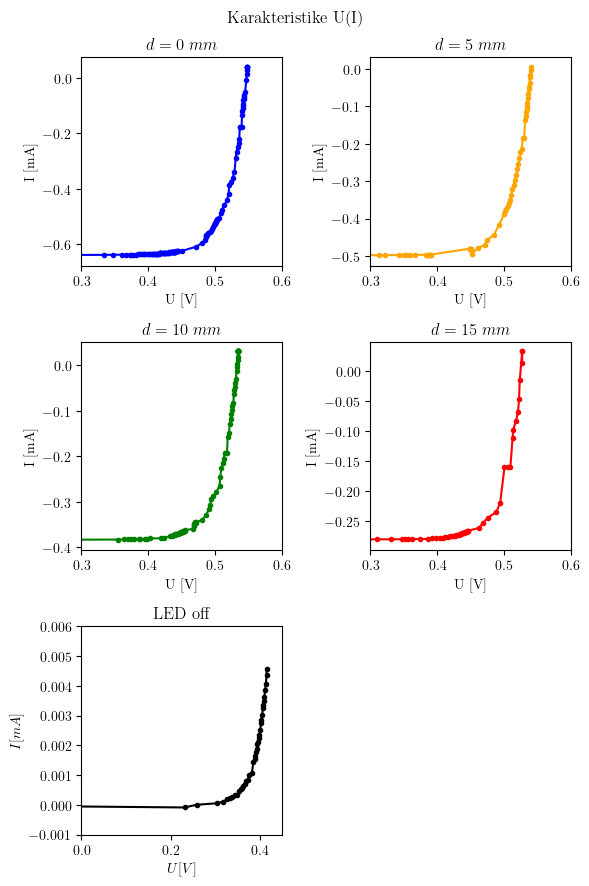

In [284]:
fig, ax = plt.subplots(3, 2, figsize=[6, 9],constrained_layout=True)
fig.delaxes(ax[2,1])
plt.suptitle("Karakteristike U(I)")

a = "meritve/foto_off.txt"
mer = ["meritve/foto_0mm.txt", "meritve/foto_5mm.txt", "meritve/foto_10mm.txt", "meritve/foto_15mm.txt"]

for data, axs, d, col in zip(mer, ax.flatten(), ["$d = 0\; mm$", "$d = 5\; mm$", "$d = 10\; mm$", "$d = 15\; mm$"], ["blue", "orange", "green", "red"]):

    dat = np.loadtxt(data)
    axs.plot(-dat[:, 0], -dat[:, 1], marker =".", color=f"{col}")

    I = dat[:, 1]
    axs.set_title(f"{d}")
    axs.set_xlabel(r"U [V]")
    axs.set_ylabel(r"I [mA]")
    axs.set_xlim(0.3, 0.6)
    I_0 = I[np.argmin(np.abs(dat[:, 0]))]

data = np.loadtxt(a)
ax[2, 0].plot(-data[:, 0], -data[:, 1], marker = '.', color = 'k' )
ax[2, 0].set_xlim(0, 0.45)
ax[2, 0].set_ylim(-0.001, 0.006)
ax[2, 0].set_title(f'LED off')
ax[2, 0].set_xlabel(r'$U[V]$')
ax[2, 0].set_ylabel(r'$I[mA]$')

data = np.loadtxt("meritve/foto_0mm.txt")
U = data[:, 0]
I = data[:, 1]

U_0 = U[np.argmin(np.abs(U))]
I_0 = I[np.argmin(np.abs(U))]

print(U_0, -I_0)

fig.tight_layout()
fig.savefig("foto")


In [231]:
mer_gal = ["meritve/galv_0mm.txt", "meritve/galv_5mm.txt", "meritve/galv_10mm.txt", "meritve/galv_15mm.txt"]



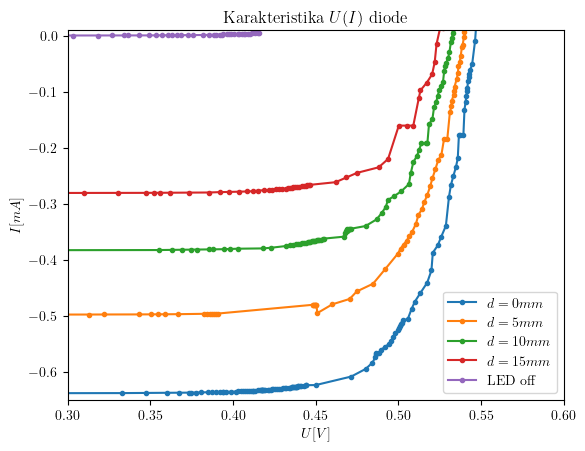

In [286]:
fig1, ax1 = plt.subplots()

meritve = ["meritve/foto_0mm.txt", "meritve/foto_5mm.txt", "meritve/foto_10mm.txt", "meritve/foto_15mm.txt", "meritve/foto_off.txt"]

for data, d in zip(meritve, [0, 5, 10, 15, 0]):
    if data == "meritve/foto_off.txt":
        dat = np.loadtxt(data)
        ax1.plot(-dat[:, 0], -dat[:, 1], marker = '.', label=f'LED off')
    else:
        dat = np.loadtxt(data)
        ax1.plot(-dat[:, 0], -dat[:, 1], marker='.', label=f'$d={d}mm$') 
    
ax1.set_title("Karakteristika $U(I)$ diode")
ax1.set_xlabel("$U[V]$")
ax1.set_ylabel("$I[mA]$")
ax1.legend(loc="lower right")
ax1.set_xlim(0.3,  0.6)
ax1.set_ylim(-0.65, 0.01)
fig1.savefig("karakteristika")

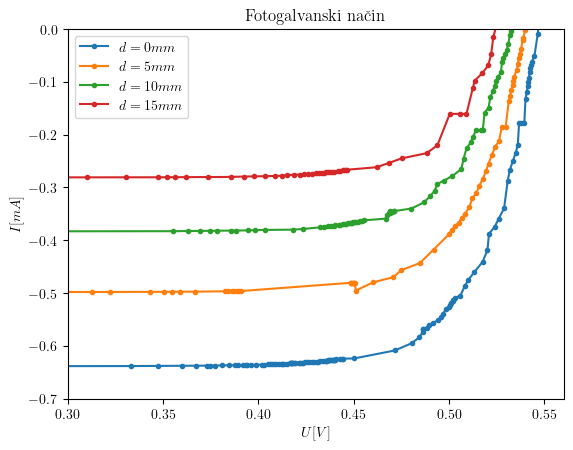

In [288]:
fig2, ax2 = plt.subplots()

meritve1 = ["meritve/galv_0mm.txt", "meritve/galv_5mm.txt", "meritve/galv_10mm.txt", "meritve/galv_15mm.txt"]

for data, d in zip(meritve, [0, 5, 10, 15]):
    dat = np.loadtxt(data)
    ax2.plot(-dat[:, 0], -dat[:, 1], marker='.', label=f'$d={d}mm$')
    
ax2.set_title("Fotogalvanski način")
ax2.set_xlabel("$U[V]$")
ax2.set_ylabel("$I[mA]$")
ax2.legend()
ax2.set_xlim(0.3, 0.56)
ax2.set_ylim(-0.7, 0)
fig2.savefig("galvanski")

In [278]:
# Need to convert as current is in milliamps elswhere
I_0 = -1*1e-3 * -I[np.argmin(np.abs(U))]
ΔI_0 = -1*1e-3 * -I[np.argmin(np.abs(U)) -1] - I_0

χ, Δχ = 0.42, 0.01
ν, Δν = 0.75, 0.1
U_LED, ΔU_LED = 1.879, 0.001
I_LED, ΔI_LED = 23.31e-3, 0.05e-3

η = I_0 / (χ*ν * U_LED*I_LED)
Δη = np.sqrt(
    (1 / (χ*ν * U_LED*I_LED) * ΔI_0)**2 +
    (-I_0 / (χ**2 * ν * U_LED*I_LED) * Δχ)**2 +
    (-I_0 / (χ * ν**2 * U_LED*I_LED) * Δν)**2 +
    (-I_0 / (χ*ν * U_LED**2 * I_LED) * ΔU_LED)**2 +
    (-I_0 / (χ*ν * U_LED * I_LED**2) * ΔI_LED)**2
)
η, Δη

(0.04632916161338067, 0.006275835519926087)

In [306]:
I_0 = -1*1e-3 * -I[np.argmin(np.abs(U))]

I_0 = unp.uarray([I_0], [0.00005])
print(I_0)
v = unp.uarray([0.75], [0.1])
x = unp.uarray([0.42], [0.01])
U_L = unp.uarray([1.88], [0.01])
I_L = unp.uarray([23.30e-3], [0.05e-3])

n = I_0 / (x * v * U_L * I_L)

n

[0.000639196+/-5e-05]


array([0.04632439162619055+/-0.007250388747524626], dtype=object)

In [304]:
data = np.loadtxt("meritve/foto_0mm.txt")
U = data[:, 0]
I = data[:, 1]

def e(x: int, a: int = -6.40715860e-01, b: int=5.90634650e-10, c: int=3.80874077e+01):
    return a+b*np.exp(x*c)

curve_fit(e, -U, -I)
print(e(0))

-0.6407158594093654
